<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Convolutional-Neural-Networks" data-toc-modified-id="Convolutional-Neural-Networks-1">Convolutional Neural Networks</a></span><ul class="toc-item"><li><span><a href="#Requirements" data-toc-modified-id="Requirements-1.1">Requirements</a></span></li></ul></li><li><span><a href="#Experiments" data-toc-modified-id="Experiments-2">Experiments</a></span></li><li><span><a href="#Grading" data-toc-modified-id="Grading-3">Grading</a></span></li><li><span><a href="#Extra-Credit" data-toc-modified-id="Extra-Credit-4">Extra Credit</a></span></li></ul></div>

# Convolutional Neural Networks

For this assignment, use the `NeuralNetworkClassifier_CNN` class defined for you in `neuralnetworks_A4.py` contained in [A4code.tar](https://www.cs.colostate.edu/~anderson/cs545/notebooks/A4code.tar).  This tar file also includes other functions you will use here, contained in `mlfuncs.py`.

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import itertools
%matplotlib inline

import neuralnetworks_A4 as nn
import mlfuncs

## Requirements

First, look carefully at the `neuralnetworks_A4.py` and `optimizers.py` code provided above.  Some changes have been made in each. The most significant change is that the `train` function now accepts a `batch_size` argument so that the gradients we calculate don't have to be over the whole training set.  Recall that we can easily run out of memory with convolutional networks if we calculate gradients over the whole training set.  Also, `'scg'` is not a valid optimizer in this version of the code.

Implement the following functions:

    dataframe_result = run_these_parameters(X, T, n_folds,
                                            layers_structs, 
                                            methods, 
                                            epochs, 
                                            learning_rates.
                                            batch_sizes)
                                              
    result = train_this_partition(Xtrain, Ttrain, Xval, Tval, Xtest, Ttest,
                                  struct,
                                  n_epochs, 
                                  method, 
                                  learning_rate,
                                  batch_size)
                                  
The file `mlfuncs.py` contains several functions you will need to define these two required functions.  They are illustrated in the following examples.

In [3]:
Y = np.array([0, 1, 1, 0, 0]).reshape(-1, 1)
T = np.array([0, 1, 0, 1, 0]).reshape(-1, 1)
mlfuncs.percent_equal(Y, T)

60.0

The purpose of that one is obvious.  This next one is needed for storing your network stucture in a pandas DataFrame.  The structure must be an immutable data type.  A list is mutable, but a tuple is not.  So we must make sure all parts of the network structure specification is composed of tuples, not lists.

In [4]:
struct = [ [], [10]]
mlfuncs.list_to_tuple(struct)

((), (10,))

In [5]:
struct = [ [[2, 4, 1], [5, 4, 2]], [20, 10]]
mlfuncs.list_to_tuple(struct)

(((2, 4, 1), (5, 4, 2)), (20, 10))

And here is a function that generates all training, validation, and testing partitions given the data and the number of folds.  It creates the partitions in a stratified manner, meaning all folds will have close to the same proportion of samples from each class.

In [6]:
X = np.arange(12).reshape(6, 2)
T = np.array([0, 0, 1, 0, 1, 1]).reshape(-1, 1)
X, T

(array([[ 0,  1],
        [ 2,  3],
        [ 4,  5],
        [ 6,  7],
        [ 8,  9],
        [10, 11]]),
 array([[0],
        [0],
        [1],
        [0],
        [1],
        [1]]))

In [7]:
for Xtrain, Ttrain, Xval, Tval, Xtest, Ttest in mlfuncs.generate_partitions(X, T, n_folds=3, classification=True):
        print(Xtrain, '\n', Ttrain, '\n', Xval, '\n', Tval, '\n', Xtest, '\n', Ttest)
        print()

[[0 1]
 [8 9]] 
 [[0]
 [1]] 
 [[6 7]
 [4 5]] 
 [[0]
 [1]] 
 [[ 2  3]
 [10 11]] 
 [[0]
 [1]]

[[6 7]
 [4 5]] 
 [[0]
 [1]] 
 [[0 1]
 [8 9]] 
 [[0]
 [1]] 
 [[ 2  3]
 [10 11]] 
 [[0]
 [1]]

[[0 1]
 [8 9]] 
 [[0]
 [1]] 
 [[ 2  3]
 [10 11]] 
 [[0]
 [1]] 
 [[6 7]
 [4 5]] 
 [[0]
 [1]]

[[ 2  3]
 [10 11]] 
 [[0]
 [1]] 
 [[0 1]
 [8 9]] 
 [[0]
 [1]] 
 [[6 7]
 [4 5]] 
 [[0]
 [1]]

[[6 7]
 [4 5]] 
 [[0]
 [1]] 
 [[ 2  3]
 [10 11]] 
 [[0]
 [1]] 
 [[0 1]
 [8 9]] 
 [[0]
 [1]]

[[ 2  3]
 [10 11]] 
 [[0]
 [1]] 
 [[6 7]
 [4 5]] 
 [[0]
 [1]] 
 [[0 1]
 [8 9]] 
 [[0]
 [1]]



The function `run_these_parameters` loops through all values in `layers_structs`, `methods`, `epochs`, `learning rates` and `batch_sizes`.  For each set of parameter values, it loops through all ways of creating training, validation, and testing partitions using `n_folds`.  For each of these repetitions, `train_this_partition` is called to create the specified convolutional neural network, trains it, collects the percent correct on training, validation, and test sets, and returns a list of parameter values and the three accuracies.  `run_these_parameters` returns all of these results as a `pandas` DataFrame with column names `('struct', 'method', 'n_epochs', 'learning_rate', 'batch_size', 'train %', 'val %', 'test %')`. 

The resulting DataFrame results stored in variable `df` can be summarized with a statement like

      df.groupby(['struct', 'method', 'n_epochs', 'learning_rate',
                  'batch_size']).mean())

In [239]:
## Ru_these_parameter
#FIXED
def run_these_parameters(X, T, n_folds,
                         structs,
                          methods,
                          epochs,
                          learning_rates,
                          batch_sizes):
    column_names = ('structs','methods','epochs','learning_rates','batch_sizes')
    result = pd.DataFrame((itertools.product(structs,methods,epochs,learning_rates,batch_sizes)),columns = column_names)
    #print(result)
    percent_trains = []
    percent_vals = []
    percent_tests = []
    new_result = pd.DataFrame(columns = ['structs','methods','epochs','learning_rates','batch_sizes','train %','val %','test %'])
    for i,valuepassing in result.iterrows():
            for Xtrain, Ttrain,Xval,Tval, Xtest, Ttest in mlfuncs.generate_partitions(X, T, n_folds, validation=True, shuffle=True, classification=True):
                struct = valuepassing['structs']
                n_epochs = valuepassing['epochs']
                method = valuepassing['methods']
                learning_rate = valuepassing['learning_rates']
                batch_size = valuepassing['batch_sizes']
                temp_list = train_this_partition(Xtrain, Ttrain, Xval, Tval, Xtest, Ttest,struct, n_epochs, method, learning_rate, batch_size)
                percent_train = (temp_list[-3])
                percent_val = (temp_list[-2])
                percent_test = (temp_list[-1])
                temp_list_2 = [[struct,method,n_epochs,learning_rate,batch_size,percent_train,percent_val,percent_test]]
                #new_result = new_result.append(temp_list_2,ignore_index=True)
                new_result = new_result.append(pd.DataFrame(temp_list_2, columns=['structs','methods','epochs','learning_rates','batch_sizes','train %','val %','test %']), ignore_index=True)
    return new_result

In [240]:
def train_this_partition(Xtrain, Ttrain, Xval, Tval, Xtest, Ttest,
                              struct, n_epochs, method, learning_rate, batch_size):
    #print(struct, n_epochs, method, learning_rate, batch_size)
    results = []
    classes = np.unique(Ttrain)
    cnn = nn.NeuralNetworkClassifier_CNN(Xtrain[1].shape,struct[0],struct[1], classes)
    #print(cnn)
    cnn.train( Xtrain, Ttrain, n_epochs, method, learning_rate, momentum=0.1, batch_size=None, verbose=False)
    Ytrain,_ = cnn.use(Xtrain)
    Yval,_ = cnn.use(Xval)
    Ytest,_ = cnn.use(Xtest)
    #print(Ytrain,Ttrain)
    percent_train = mlfuncs.percent_equal(Ytrain, Ttrain)
    percent_val = mlfuncs.percent_equal(Yval, Tval)
    percent_test = mlfuncs.percent_equal(Ytest, Ttest)
    return [mlfuncs.list_to_tuple(struct), method, n_epochs, learning_rate,batch_size,percent_train,percent_val,percent_test]

Define the two required functions in code cells above this cell.

The following examples show examples of how they should run, as

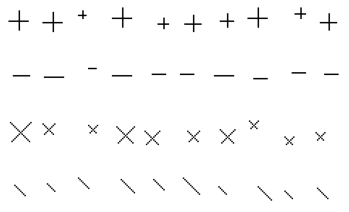

In [94]:
def make_images(n_each_class):
    '''Make 20x20 black and white images with diamonds or squares for the two classes, as line drawings.'''
    images = np.zeros((n_each_class * 4, 20, 20))  # nSamples, rows, columns
    radii = 3 + np.random.randint(10 - 5, size=(n_each_class * 4, 1))
    centers = np.zeros((n_each_class * 4, 2))
    for i in range(n_each_class * 4):
        r = radii[i, 0]
        centers[i, :] = r + 1 + np.random.randint(18 - 2 * r, size=(1, 2))
        x = int(centers[i, 0])
        y = int(centers[i, 1])
        if i < n_each_class:
            # plus
            images[i, x - r:x + r, y] = 1.0
            images[i, x, y - r:y + r] = 1.0
        elif i < n_each_class * 2:
            # minus
            images[i, x, y - r:y + r] = 1.0
        elif i < n_each_class * 3:
            # x
            images[i, range(x - r, x + r), range(y - r, y + r)] = 1.0
            images[i, range(x - r, x + r), range(y + r, y - r, -1)] = 1.0
        else:
            # /
            images[i, range(x - r, x + r), range(y - r, y + r)] = 1.0

    T = np.array(['plus'] * n_each_class + ['minus'] * n_each_class + ['times'] * n_each_class + ['divide'] * n_each_class).reshape(-1, 1)

    n, r, c = images.shape
    images = images.reshape(n, r, c, 1)  # add channel dimsension
    return images, T

n_each_class = 10
X, T = make_images(n_each_class)
p = 0
for i in range(4 * n_each_class):
    p += 1
    plt.subplot(4, n_each_class, p)
    plt.imshow(-X[i, :, :, 0], cmap='gray')
    plt.axis('off')

In [12]:
n_each_class = 500
X, T = make_images(n_each_class)
X.shape

(2000, 20, 20, 1)

In [13]:
# from A4mysolution import *

In [241]:
struct = [ [[2, 5, 1]], [5] ]
n_epochs = 10
method= 'adam'
learning_rate = 0.01
batch_size = 10

n_samples = X.shape[0]
rows = np.arange(n_samples)
np.random.shuffle(rows)
ntrain = int(n_samples * 0.8)
nval = int(n_samples * 0.1)
Xtrain = X[rows[:ntrain], ...]
Ttrain = T[rows[:ntrain], ...]
Xval = X[rows[ntrain:ntrain+nval], ...]
Tval = T[rows[ntrain:ntrain+nval], ...]
Xtest = X[rows[ntrain+nval:], ...]
Ttest = T[rows[ntrain+nval:], ...]         
#print(np.unique(Ttrain))
result = train_this_partition(Xtrain, Ttrain, Xval, Tval, Xtest, Ttest,
                              struct, n_epochs, method, learning_rate, batch_size)
result

[(((2, 5, 1),), (5,)), 'adam', 10, 0.01, 10, 77.34375, 81.25, 62.5]

In [34]:
df = run_these_parameters(X, T, n_folds=4,
                         structs=[
                             # [ [], [] ],
                             # [ [], [10] ],
                             [[[5, 3, 1]], []],
                             # [[[20, 3, 2], [5, 3, 1]], [20]],
                            ],
                          methods=['adam'], # , 'sgd'],
                          epochs=[10, 20],
                          learning_rates=[0.01], #, 0.1],
                          batch_sizes=[-1, 10, 50, 100])
df

,structs,methods,epochs,learning_rates,batch_sizes,train %,val %,test %
0,"[[[5, 3, 1]], []]",adam,10,0.01,-1,92.50,77.5,75.0
1,"[[[5, 3, 1]], []]",adam,10,0.01,-1,95.00,80.0,85.0
2,"[[[5, 3, 1]], []]",adam,10,0.01,-1,97.50,85.0,82.5
3,"[[[5, 3, 1]], []]",adam,10,0.01,-1,98.75,80.0,77.5
4,"[[[5, 3, 1]], []]",adam,10,0.01,-1,98.75,82.5,82.5
...,...,...,...,...,...,...,...,...
91,"[[[5, 3, 1]], []]",adam,20,0.01,100,100.00,85.0,87.5
92,"[[[5, 3, 1]], []]",adam,20,0.01,100,100.00,75.0,90.0
93,"[[[5, 3, 1]], []]",adam,20,0.01,100,100.00,75.0,77.5
94,"[[[5, 3, 1]], []]",adam,20,0.01,100,100.00,77.5,72.5


# Experiments

When you have `train_this_partition` and `run_these_parameters`, use them to explore the parameter values, trying to find combinations of parameter values that result in high validation accuracies.  

Start with one value for each of the five parameters, but remember to specifiy them as a list of one element, like `learning_rates=[0.01]`.  Then run again with 3 or 4 values for one parameter.  Note the best value.  Use that value for that parameter, then add more values for a different parameter.  

Proceed this way for each of the parameter values.  Discuss what you observe after each call to `run_these_parameters` with at least two sentences for each run.  Do the parameter values you find that work best surprise you?  Also discuss how well the validation and test accuracies equal each other.

For each method, try various hidden layer structures, learning rates, and numbers of epochs.  Use the validation percent accuracy to pick the best hidden layers, learning rates and numbers of epochs for each method.  Report training, validation and test accuracy for your best validation results for each of the three methods.


Experimentation Begins From the Cell Below

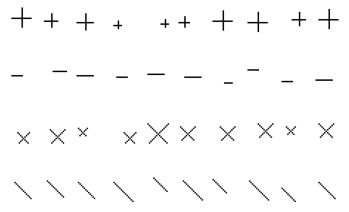

In [97]:
n_each_class = 10
X, T = make_images(n_each_class)
p = 0
for i in range(4 * n_each_class):
    p += 1
    plt.subplot(4, n_each_class, p)
    plt.imshow(-X[i, :, :, 0], cmap='gray')
    plt.axis('off')

In [115]:
n_each_class = 500
X, T = make_images(n_each_class)
X.shape

(2000, 20, 20, 1)

1. Begining with the structure of the layer of neural network and keeping others as constant.

In [178]:
df = run_these_parameters(X, T, n_folds=4,
                         structs=[
                             [ [], [] ],
                             #[ [], [10] ],
                             #[[[10, 3, 1]], []],
                             #[[[20, 3, 2], [5, 3, 1]], [20]],
                            ],
                          methods=['adam'], # , 'sgd'],
                          epochs=[10],
                          learning_rates=[0.01], #, 0.1],
                          batch_sizes=[10])
print("After very run we print the Maximum Percentage validation and Layerinfo for that validation percentage")
MaxValidation = df.max()['val %']
print("Maximum value for Percent_Validation is",MaxValidation)
MaxvalueIndex = []
MaxvalueIndex = df['val %'].argmax()
Layerinfo1 = df.iloc[MaxvalueIndex]
print('Neural Network parameters for maximum percentage validation')
print(Layerinfo1[0:7])
print("We are excluding the test percentage so as to avoid peeking")

After very run we print the Maximum Percentage validation and Layerinfo for that validation percentage
Maximum value for Percent_Validation is 81.2
Neural Network parameters for maximum percentage validation
structs           [[], []]
methods               adam
epochs                  10
learning_rates        0.01
batch_sizes             10
train %               83.2
val %                 81.2
Name: 0, dtype: object
We are excluding the test percentage so as to avoid peeking


Conclusion : 
1. Starting with a simple linear model .i.e. with no convolution layer and no fully connected layer we get a lower percentage validation.
2. Even with lower value of number of epochs we get a significantly higher value of validation percentage.
3. The lower value of learning rate also significantly contributes to the lower value of training percentage, due to hunting for a better local minima.

In [179]:
for i in range(1):
    df = run_these_parameters(X, T, n_folds=4,
                         structs=[
                             [ [], [] ],
                             [ [], [10] ],
                             [[[10, 3, 1]], []],
                             [[[20, 3, 2], [5, 3, 1]], [15]],
                            ],
                          methods=['adam'], # , 'sgd'],
                          epochs=[10],
                          learning_rates=[0.01], #, 0.1],
                          batch_sizes=[10])
    print("After very run we print the Maximum Percentage validation and Layerinfo for that validation percentage")
    MaxValidation = df.max()['val %']
    print("Maximum value for Percent_Validation is",MaxValidation)
    MaxvalueIndex = []
    MaxvalueIndex = df['val %'].argmax()
    Layerinfo2 = df.iloc[MaxvalueIndex]
    print('Neural Network parameters for maximum percentage validation')
    print(Layerinfo2[0:7])
    print("We are excluding the test percentage so as to avoid peeking")

After very run we print the Maximum Percentage validation and Layerinfo for that validation percentage
Maximum value for Percent_Validation is 79.2
Neural Network parameters for maximum percentage validation
structs           [[], []]
methods               adam
epochs                  10
learning_rates        0.01
batch_sizes             10
train %               81.6
val %                 79.2
Name: 7, dtype: object
We are excluding the test percentage so as to avoid peeking


Conclusion : 
1. Here we get a slightly better validation percentage without overfitting the training data with all the outcomes.
2. A convolutional layer does improve the performance of a network, even with a low training percentage.
3. We get an almost identical value for percent validation and percent training.
4. Here we get a best value for the structure of the neural network.

2. Now keeping neural network layer fixed we vary learning rate, and keep other paramters as constant.

In [180]:
for i in range(1):
    df = run_these_parameters(X, T, n_folds=4,
                         structs=[
                             #[ [], [] ],
                             #[ [], [10] ],
                             [[[10, 3, 1]], []],
                             #[[[20, 3, 2], [5, 3, 1]], [15]],
                             #[[[8, 4, 1]], [10],[5]],
                            ],
                          methods=['adam'], # , 'sgd'],
                          epochs=[10],
                          learning_rates=[0.01], #, 0.1],
                          batch_sizes=[10])
    print("After very run we print the Maximum Percentage validation and Layerinfo for that validation percentage")
    MaxValidation = df.max()['val %']
    print("Maximum value for Percent_Validation is",MaxValidation)
    MaxvalueIndex = []
    MaxvalueIndex = df['val %'].argmax()
    Layerinfo3 = df.iloc[MaxvalueIndex]
    print('Neural Network parameters for maximum percentage validation')
    print(Layerinfo3[0:7])
    print("We are excluding the test percentage so as to avoid peeking")

After very run we print the Maximum Percentage validation and Layerinfo for that validation percentage
Maximum value for Percent_Validation is 73.2
Neural Network parameters for maximum percentage validation
structs           [[[10, 3, 1]], []]
methods                         adam
epochs                            10
learning_rates                  0.01
batch_sizes                       10
train %                         72.7
val %                           73.2
Name: 0, dtype: object
We are excluding the test percentage so as to avoid peeking


Conclusions:
1. With a learning rate of 0.01 we get a lower validation here than in the previous example.
2. A significant drop in validation percentage is seen even though training percentage is almost same.

In [181]:
for i in range(1):
    df = run_these_parameters(X, T, n_folds=4,
                         structs=[
                             #[ [], [] ],
                             #[ [], [10] ],
                             [[[10, 3, 1]], []],
                             #[[[20, 3, 2], [5, 3, 1]], [15]],
                             #[[[8, 4, 1]], [10],[5]],
                            ],
                          methods=['adam'], # , 'sgd'],
                          epochs=[10],
                          learning_rates=[0.0001,0.005,0.009,0.01,0.07,0.1], #, 0.1],
                          batch_sizes=[10])
    print("After very run we print the Maximum Percentage validation and Layerinfo for that validation percentage")
    MaxValidation = df.max()['val %']
    print("Maximum value for Percent_Validation is",MaxValidation)
    MaxvalueIndex = []
    MaxvalueIndex = df['val %'].argmax()
    Layerinfo4 = df.iloc[MaxvalueIndex]
    print('Neural Network parameters for maximum percentage validation')
    print(Layerinfo4[0:7])
    print("We are excluding the test percentage so as to avoid peeking")

After very run we print the Maximum Percentage validation and Layerinfo for that validation percentage
Maximum value for Percent_Validation is 80.60000000000001
Neural Network parameters for maximum percentage validation
structs           [[[10, 3, 1]], []]
methods                         adam
epochs                            10
learning_rates                 0.009
batch_sizes                       10
train %                         79.8
val %                           80.6
Name: 33, dtype: object
We are excluding the test percentage so as to avoid peeking


Conclusion : 
1. At a lower value of learning_rate, percentage validation increases without any significant increase in training percentage,  2. A lower value of learning_rate does significantly increase the risk of the neural network hunting for a better local minima, which could lead to worse results.

3. Fixing neural net layer and learning_rate we now change method and keep others constant.

In [182]:
for i in range(1):
    df = run_these_parameters(X, T, n_folds=4,
                         structs=[
                             #[ [], [] ],
                             #[ [], [10] ],
                             [[[10, 3, 1]], []],
                             #[[[20, 3, 2], [5, 3, 1]], [15]],
                             #[[[8, 4, 1]], [10],[5]],
                            ],
                          methods=['adam','sgd'], # , 'sgd'],
                          epochs=[10],
                          learning_rates=[0.005], #, 0.1],
                          batch_sizes=[10])
    print("After very run we print the Maximum Percentage validation and Layerinfo for that validation percentage")
    MaxValidation = df.max()['val %']
    print("Maximum value for Percent_Validation is",MaxValidation)
    MaxvalueIndex = []
    MaxvalueIndex = df['val %'].argmax()
    Layerinfo5 = df.iloc[MaxvalueIndex]
    print('Neural Network parameters for maximum percentage validation')
    print(Layerinfo5[0:7])
    print("We are excluding the test percentage so as to avoid peeking")

After very run we print the Maximum Percentage validation and Layerinfo for that validation percentage
Maximum value for Percent_Validation is 81.39999999999999
Neural Network parameters for maximum percentage validation
structs           [[[10, 3, 1]], []]
methods                         adam
epochs                            10
learning_rates                 0.005
batch_sizes                       10
train %                         82.5
val %                           81.4
Name: 6, dtype: object
We are excluding the test percentage so as to avoid peeking


Conclusion:
1. Adam Optimizer does a give a better peromance than SGD optimizer.
2. We fix our optimizer as ADAM from here on.

4. Now we vary number of epochs and keep the rest constant.

In [183]:
for i in range(1):
    df = run_these_parameters(X, T, n_folds=4,
                         structs=[
                             #[ [], [] ],
                             #[ [], [10] ],
                             [[[10, 3, 1]], []],
                             #[[[20, 3, 2], [5, 3, 1]], [15]],
                             #[[[8, 4, 1]], [10],[5]],
                            ],
                          methods=['adam'], # , 'sgd'],
                          epochs=[1,10,25,50],
                          learning_rates=[0.005], #, 0.1],
                          batch_sizes=[10])
    print("After very run we print the Maximum Percentage validation and Layerinfo for that validation percentage")
    MaxValidation = df.max()['val %']
    print("Maximum value for Percent_Validation is",MaxValidation)
    MaxvalueIndex = []
    MaxvalueIndex = df['val %'].argmax()
    Layerinfo6 = df.iloc[MaxvalueIndex]
    print('Neural Network parameters for maximum percentage validation')
    print(Layerinfo6[0:7])
    print("We are excluding the test percentage so as to avoid peeking")

After very run we print the Maximum Percentage validation and Layerinfo for that validation percentage
Maximum value for Percent_Validation is 82.6
Neural Network parameters for maximum percentage validation
structs           [[[10, 3, 1]], []]
methods                         adam
epochs                            50
learning_rates                 0.005
batch_sizes                       10
train %                         89.1
val %                           82.6
Name: 47, dtype: object
We are excluding the test percentage so as to avoid peeking


Conclusion:
1. Increasing the number of epochs does increase validation accuracy significantly.
2. But with higher values for number of epochs and lower values for learning_rate, the neural network might keep on searching for better values and might go out of scope from the local minima.

5. Varying batches and keeping other parameters constant.

In [184]:
for i in range(1):
    df = run_these_parameters(X, T, n_folds=4,
                         structs=[
                             #[ [], [] ],
                             #[ [], [10] ],
                             [[[10, 3, 1]], []],
                             #[[[20, 3, 2], [5, 3, 1]], [15]],
                             #[[[8, 4, 1]], [10],[5]],
                            ],
                          methods=['adam'], # , 'sgd'],
                          epochs=[50],
                          learning_rates=[0.005], #, 0.1],
                          batch_sizes=[10,50,100])
    print("After very run we print the Maximum Percentage validation and Layerinfo for that validation percentage")
    MaxValidation = df.max()['val %']
    print("Maximum value for Percent_Validation is",MaxValidation)
    MaxvalueIndex = []
    MaxvalueIndex = df['val %'].argmax()
    Layerinfo7 = df.iloc[MaxvalueIndex]
    print('Neural Network parameters for maximum percentage validation')
    print(Layerinfo7[0:7])
    print("We are excluding the test percentage so as to avoid peeking")

After very run we print the Maximum Percentage validation and Layerinfo for that validation percentage
Maximum value for Percent_Validation is 85.0
Neural Network parameters for maximum percentage validation
structs           [[[10, 3, 1]], []]
methods                         adam
epochs                            50
learning_rates                 0.005
batch_sizes                      100
train %                         91.2
val %                           85.0
Name: 34, dtype: object
We are excluding the test percentage so as to avoid peeking


Conclusion: 
1. With in an increase in batch size we see that the validation accuracy increases, but we did not get our best value at batches = 100, this is because a large batch may lead to poor generalization, note that we did want consider our batch size to be the entire dataset, this would gaurantee global minima but would be slower than shorter batched which exhibit faster dynamics.
2. The plus point of using a smaller batch is also that it restricts overfitting on the training dataset, which results in poor performance on testing dataset.

In [185]:
print("Parameters that work best based on Validation acccuracy")
print(Layerinfo7[0:7])
print("")
print("")
print("Disscussion : ") 
print("1. With the above parameters we get a validation accuracy of ",MaxValidation)
print("2. A single convolution layer neural network seems to work best for this case")
print("3. A lower learning rate is effective here, contrary to my previous understanding of"
      "increasing learning leads to convergence quickly,"
      "but that is only possible if we have a large number of epochs")
print("4. Large values for number of epochs leads to more computational " 
      "load and can reach saturation quite early on a good neural network structure")
print("5. Smaller batch sizes are good for computation and can find good local minima efficiently")

Parameters that work best based on Validation acccuracy
structs           [[[10, 3, 1]], []]
methods                         adam
epochs                            50
learning_rates                 0.005
batch_sizes                      100
train %                         91.2
val %                           85.0
Name: 34, dtype: object


Disscussion : 
1. With the above parameters we get a validation accuracy of  85.0
2. A single convolution layer neural network seems to work best for this case
3. A lower learning rate is effective here, contrary to my previous understanding ofincreasing learning leads to convergence quickly,but that is only possible if we have a large number of epochs
4. Large values for number of epochs leads to more computational load and can reach saturation quite early on a good neural network structure
5. Smaller batch sizes are good for computation and can find good local minima efficiently


In [189]:
print(Layerinfo1[5:])
print(Layerinfo2[5:])
print(Layerinfo3[5:])
print(Layerinfo4[5:])
print(Layerinfo5[5:])
print(Layerinfo6[5:])
print(Layerinfo7[5:])

train %    83.2
val %      81.2
test %     77.0
Name: 0, dtype: object
train %    81.6
val %      79.2
test %     78.4
Name: 7, dtype: object
train %    72.7
val %      73.2
test %     74.4
Name: 0, dtype: object
train %    79.8
val %      80.6
test %     76.6
Name: 33, dtype: object
train %    82.5
val %      81.4
test %     78.0
Name: 6, dtype: object
train %    89.1
val %      82.6
test %     80.2
Name: 47, dtype: object
train %    91.2
val %      85.0
test %     81.4
Name: 34, dtype: object


Disscussion: 
1. As training accuracy approaches 100% we can see that the difference between Validation accuracy and Test accuracy increases, that is as the training data overfits the difference between validation and test accuracy increases, which implies overfitting a model on the training data is bad for test and validate accuracy.
2. We can see that around 80 % Training accuracy we get the difference between validation and testing accuracy to the minimum.
3. So making batch size small lowers the risk of overfitting and so we can make the Validation and Test accuracy equal.

##CONFUSION MATRIX

In [190]:
def confusion_matrix(Y_classes, T):
    class_names = np.unique(T)
    table = []
    for true_class in class_names:
        row = []
        for Y_class in class_names:
            row.append(100 * np.mean(Y_classes[T == true_class] == Y_class))
        table.append(row)
    conf_matrix = pandas.DataFrame(table, index=class_names, columns=class_names)
    # cf.style.background_gradient(cmap='Blues').format("{:.1f} %")
    print('Percent Correct')
    return conf_matrix.style.background_gradient(cmap='Blues').format("{:.1f}")

In [222]:
for Xtrain, Ttrain,Xval,Tval, Xtest, Ttest in mlfuncs.generate_partitions(X, T, n_folds, validation=True, shuffle=True, classification=True):
    break
df = run_these_parameters(X, T, n_folds=4,
                         structs=[
                            [[[10, 3, 1]], []],
                            ],
                          methods=['adam'], # , 'sgd'],
                          epochs=[50],
                          learning_rates=[0.005], #, 0.1],
                          batch_sizes=[50])
confusion_matrix(cnn.use(Xtest)[0], Ttest)

Percent Correct


,divide,minus,plus,times
divide,29.5,8.4,60.2,1.8
minus,3.0,7.2,74.1,15.7
plus,53.0,6.6,38.0,2.4
times,69.3,4.8,24.7,1.2


Discussion:
1. For 29.5% times we get divide value accurately in test data, 60.2 % times we get divide as plus in test data,8.4% times we get divide as minus in test data and 1.8% time we get divide as times in test data.
2. For 7.2% times we minus accurately in test data,74.1% times we get minus as plus in test data, 15.7% times we minus as times in test data and 3.0% times we get minus as divide in test data.
3. For 53.0% times we get plus as divide in test data, 38.0% times we get plus accurately in test data, 6.6% times we get plus as minus in test data,2.4% times we plus as times in test data.
4. 69.3% times we get times as divide in test data, 4.8% times we get times as minus in test data, 24.7% times we get times as plus in  test data and 1.2% times we times accurately.

Experimentation for methods

In [218]:
n_each_class = 500
X, T = make_images(n_each_class)

In [224]:
print("1st iteration output")
for i in range(1):
    df = run_these_parameters(X, T, n_folds=4,
                         structs=[
                             #[ [], [] ],
                             #[ [], [10] ],
                             [[[10, 3, 1]], []],
                             #[[[20, 3, 2], [5, 3, 1]], [15]],
                             #[[[8, 4, 1]], [10],[5]],
                            ],
                          methods=['adam'], # , 'sgd'],
                          epochs=[50],
                          learning_rates=[0.005], #, 0.1],
                          batch_sizes=[50])
    print("After very run we print the Maximum Percentage validation and Layerinfo for that validation percentage")
    MaxValidation = df.max()['val %']
    print("Maximum value for Percent_Validation is",MaxValidation)
    MaxvalueIndex = []
    MaxvalueIndex = df['val %'].argmax()
    Layerinfo8 = df.iloc[MaxvalueIndex]
    print('Neural Network parameters for maximum percentage validation')
    print(Layerinfo8)
    #print("We are excluding the test percentage so as to avoid peeking")

1st iteration output
After very run we print the Maximum Percentage validation and Layerinfo for that validation percentage
Maximum value for Percent_Validation is 83.0
Neural Network parameters for maximum percentage validation
structs           [[[10, 3, 1]], []]
methods                         adam
epochs                            50
learning_rates                 0.005
batch_sizes                       50
train %                         93.0
val %                           83.0
test %                          78.6
Name: 8, dtype: object


In [225]:
print("1st iteration output")
for i in range(1):
    df = run_these_parameters(X, T, n_folds=4,
                         structs=[
                             #[ [], [] ],
                             #[ [], [10] ],
                             [[[10, 3, 1]], []],
                             #[[[20, 3, 2], [5, 3, 1]], [15]],
                             #[[[8, 4, 1]], [10],[5]],
                            ],
                          methods=['sgd'], # , 'sgd'],
                          epochs=[50],
                          learning_rates=[0.005], #, 0.1],
                          batch_sizes=[50])
    print("After very run we print the Maximum Percentage validation and Layerinfo for that validation percentage")
    MaxValidation = df.max()['val %']
    print("Maximum value for Percent_Validation is",MaxValidation)
    MaxvalueIndex = []
    MaxvalueIndex = df['val %'].argmax()
    Layerinfo9 = df.iloc[MaxvalueIndex]
    print('Neural Network parameters for maximum percentage validation')
    print(Layerinfo9)
    #print("We are excluding the test percentage so as to avoid peeking")

1st iteration output
After very run we print the Maximum Percentage validation and Layerinfo for that validation percentage
Maximum value for Percent_Validation is 68.8
Neural Network parameters for maximum percentage validation
structs           [[[10, 3, 1]], []]
methods                          sgd
epochs                            50
learning_rates                 0.005
batch_sizes                       50
train %                         66.5
val %                           68.8
test %                          64.2
Name: 1, dtype: object


Discussion:
1. From the above two iterations we can see that the ADAM performs better with a convolutional neural network than a SGD optimizer.
2. As we can also see that as the training accuracy approaches 100% the difference between our test and validation accuracy is increasing.

In [235]:
print("2nd iteration output")
for i in range(1):
    df = run_these_parameters(X, T, n_folds=4,
                         structs=[
                             [ [], [] ],
                             #[ [], [10] ],
                             #[[[10, 3, 1]], []],
                             #[[[20, 3, 2], [5, 3, 1]], [15]],
                             #[[[8, 4, 1]], [10],[5]],
                            ],
                          methods=['adam'], # , 'sgd'],
                          epochs=[30],
                          learning_rates=[0.08], #, 0.1],
                          batch_sizes=[10])
    print("After very run we print the Maximum Percentage validation and Layerinfo for that validation percentage")
    MaxValidation = df.max()['val %']
    print("Maximum value for Percent_Validation is",MaxValidation)
    MaxvalueIndex = []
    MaxvalueIndex = df['val %'].argmax()
    Layerinfo9 = df.iloc[MaxvalueIndex]
    print('Neural Network parameters for maximum percentage validation')
    print(Layerinfo9)
    #print("We are excluding the test percentage so as to avoid peeking")

2nd iteration output
After very run we print the Maximum Percentage validation and Layerinfo for that validation percentage
Maximum value for Percent_Validation is 84.0
Neural Network parameters for maximum percentage validation
structs           [[], []]
methods               adam
epochs                  30
learning_rates        0.08
batch_sizes             10
train %               98.1
val %                 84.0
test %                80.2
Name: 10, dtype: object


In [236]:
print("2nd iteration output")
for i in range(1):
    df = run_these_parameters(X, T, n_folds=4,
                         structs=[
                             [ [], [] ],
                             #[ [], [10] ],
                             #[[[10, 3, 1]], []],
                             #[[[20, 3, 2], [5, 3, 1]], [15]],
                             #[[[8, 4, 1]], [10],[5]],
                            ],
                          methods=['sgd'], # , 'sgd'],
                          epochs=[30],
                          learning_rates=[0.08], #, 0.1],
                          batch_sizes=[10])
    print("After very run we print the Maximum Percentage validation and Layerinfo for that validation percentage")
    MaxValidation = df.max()['val %']
    print("Maximum value for Percent_Validation is",MaxValidation)
    MaxvalueIndex = []
    MaxvalueIndex = df['val %'].argmax()
    Layerinfo9 = df.iloc[MaxvalueIndex]
    print('Neural Network parameters for maximum percentage validation')
    print(Layerinfo9)
    #print("We are excluding the test percentage so as to avoid peeking")

2nd iteration output
After very run we print the Maximum Percentage validation and Layerinfo for that validation percentage
Maximum value for Percent_Validation is 73.6
Neural Network parameters for maximum percentage validation
structs           [[], []]
methods                sgd
epochs                  30
learning_rates        0.08
batch_sizes             10
train %               73.5
val %                 73.6
test %                67.6
Name: 5, dtype: object


Discussion:
1. We can see here that a lower batch size lowers computational load and increases time response.
2. ADAM performs even with a linear model for neural network structure.

In [ ]:
print("multiple iteration output")
for i in range(1):
    df = run_these_parameters(X, T, n_folds=4,
                         structs=[
                             [ [], [] ],
                             [ [], [10] ],
                             [[[10, 3, 1]], []],
                             [[[20, 3, 2], [5, 3, 1]], [15]],
                             [[[8, 4, 1]], [10],[5]],
                            ],
                          methods=['adam','sgd'], # , 'sgd'],
                          epochs=[10,20,30],
                          learning_rates=[0.04,0.08,0.1], #, 0.1],
                          batch_sizes=[5,10,15])
    print("After very run we print the Maximum Percentage validation and Layerinfo for that validation percentage")
    MaxValidation = df.max()['val %']
    print("Maximum value for Percent_Validation is",MaxValidation)
    MaxvalueIndex = []
    MaxvalueIndex = df['val %'].argmax()
    Layerinfo9 = df.iloc[MaxvalueIndex]
    print('Neural Network parameters for maximum percentage validation')
    print(Layerinfo9)
    #print("We are excluding the test percentage so as to avoid peeking")

# Grading

(UPDATED Oct. 21, 9:35am, tolerance on accuracies is now larger) Download [A4grader.tar](https://www.cs.colostate.edu/~anderson/cs545/notebooks/A4grader.tar), extract `A4grader.py` before running the following cell.

In [238]:
%run -i A4grader.py


======================= Code Execution =======================

Extracting python code from notebook named 'Shetty-A4.ipynb' and storing in notebookcode.py
Removing all statements that are not function or class defs or import statements.

Testing:

    def make_images(n_each_class):
        images = np.zeros((n_each_class * 2, 20, 20))  # nSamples, rows, columns
        radii = 3 + np.random.randint(10 - 5, size=(n_each_class * 2, 1))
        centers = np.zeros((n_each_class * 2, 2))
        for i in range(n_each_class * 2):
            r = radii[i, 0]
            centers[i, :] = r + 1 + np.random.randint(18 - 2 * r, size=(1, 2))
            x = int(centers[i, 0])
            y = int(centers[i, 1])
            if i < n_each_class:
                # squares
                images[i, x - r:x + r, y + r] = 1.0
                images[i, x - r:x + r, y - r] = 1.0
                images[i, x - r, y - r:y + r] = 1.0
                images[i, x + r, y - r:y + r + 1] = 1.0
            else:
  

<Figure size 432x288 with 0 Axes>

# Extra Credit

Repeat the above experiment using a convolutional neural network defined in `Pytorch`.  Implement this yourself by directly calling `torch.nn` functions.